In [208]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
testFileName = "Datasets/Dataset_2_test.csv"
    
testFile = pd.read_csv(testFileName, header=None)
testFile = testFile.drop([2], axis=1) # empty column
input_test = testFile[0]
output_test = testFile[1]

trainFileName = "Datasets/Dataset_2_train.csv"

trainFile = pd.read_csv(trainFileName, header=None)
trainFile = trainFile.drop([2], axis=1) # empty column
input_train = trainFile[0]
output_train = trainFile[1]

validFileName = "Datasets/Dataset_2_valid.csv"

validFile = pd.read_csv(validFileName, header=None)
validFile = validFile.drop([2], axis=1) # empty column
input_valid = validFile[0]
output_valid = validFile[1]

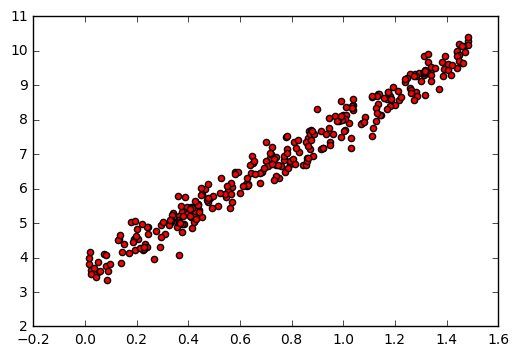

In [210]:
plt.scatter(input_train, output_train, c='r')
# Estimating that w = [2.5, 4.5]

In [211]:
def predictedY(x, w):
    return w[0] + x*w[1]

def updateWeights(x, y, w, a): # a is learning rate
    pred_y = predictedY(x, w)
    w = [w[0] - a*(pred_y-y), w[1] - a*(pred_y-y)*x]
    return w

def epoch(x, y, w, a):
    for i in range(len(x)):
        w = updateWeights(x[i], y[i], w, a)
    
    return w

def calcMse(x, y, w):
    error = 0
    for i in range(len(y)):
        pred_y = predictedY(x[i], w)
        error += (pred_y - y[i])**2
        
    error /= len(y)
    return error

def runEpochs(epochsNb, stepSize):
    trainMse = []
    validMse = []
    convergenceEpoch = epochsNb
    converged = False
    convergenceRate = 1e-5
    w = [2.5, 4.5] # Initial estimation
    for i in range (epochsNb): # sweeps
        w = epoch(input_train, output_train, w, stepSize)
        trainMse.append(calcMse(input_train, output_train, w))
        validMse.append(calcMse(input_valid, output_valid, w))
        if (i>1 and not converged and abs(validMse[-1]-validMse[-2])<convergenceRate):
            convergenceEpoch = i
            converged = True
    return trainMse, validMse, w, convergenceEpoch

In [233]:
trainMse, validMse, w, convergenceEpoch = runEpochs(5000, 1e-6)
print(w, convergenceEpoch)

[3.0674953397073366, 4.8251641415748407] 5000


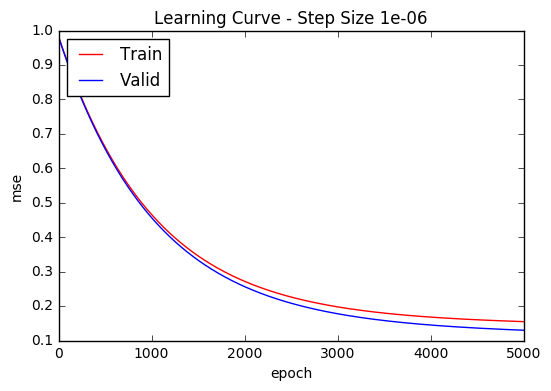

In [234]:
def plotTrainValid(trainMse, validMse, stepSize):
    plt.plot(trainMse, c='r', label="Train")
    plt.plot(validMse, c='b', label="Valid")
    plt.xlabel("epoch")
    plt.ylabel("mse")
    plt.legend(loc=2)
    plt.title("Learning Curve - Step Size " + str(stepSize))

plotTrainValid(trainMse, validMse, 1e-6)

In [235]:
# We can see that the MSE does not totally converge with a step size of 1e-6
# We want to find the step size that makes the MSE converge as fast as possible

trainMse, validMse, w, convergenceEpoch = runEpochs(5000, 1e-5)
print(w, convergenceEpoch)

[3.46393138532722, 4.4519058800745182] 2302


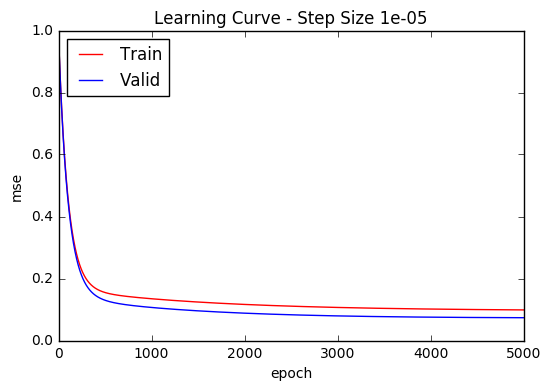

In [236]:
plotTrainValid(trainMse, validMse, 1e-5)

In [237]:
trainMse, validMse, w, convergenceEpoch = runEpochs(5000, 1e-4)
print(w, convergenceEpoch)

[3.5767075504084391, 4.3203875299358314] 503


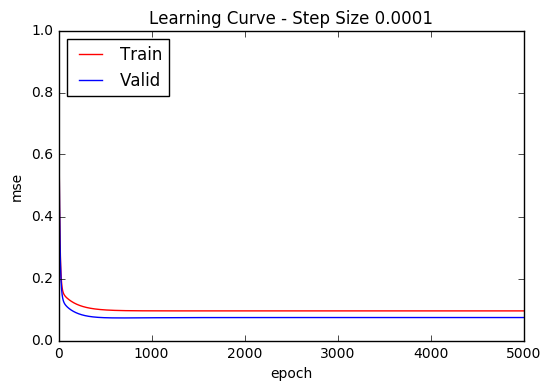

In [238]:
plotTrainValid(trainMse, validMse, 1e-4)

In [239]:
trainMse, validMse, w, convergenceEpoch = runEpochs(5000, 1e-3)
print(w, convergenceEpoch)

[3.578345871791313, 4.3213760265635059] 64


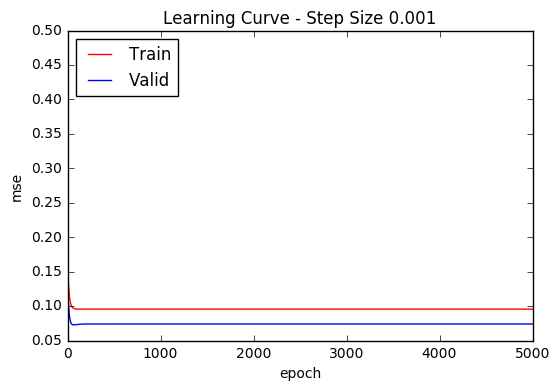

In [240]:
plotTrainValid(trainMse, validMse, 1e-3)

In [241]:
trainMse, validMse, bestStepW, convergenceEpoch = runEpochs(5000, 1e-2)
print(bestStepW, convergenceEpoch)

[3.589232765108918, 4.3247691957865344] 21


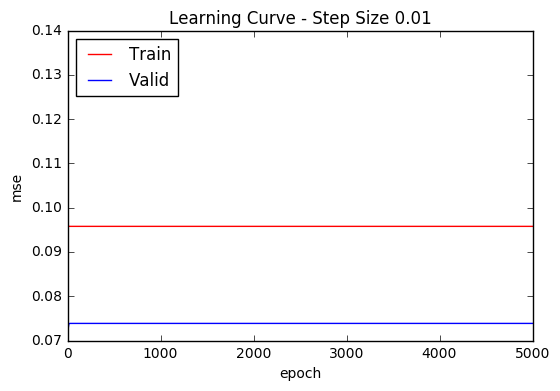

In [242]:
plotTrainValid(trainMse, validMse, 1e-2)

In [243]:
trainMse, validMse, w, convergenceEpoch = runEpochs(5000, 1e-1)
print(w, convergenceEpoch)

[3.5453067299641199, 4.1932229141532789] 3


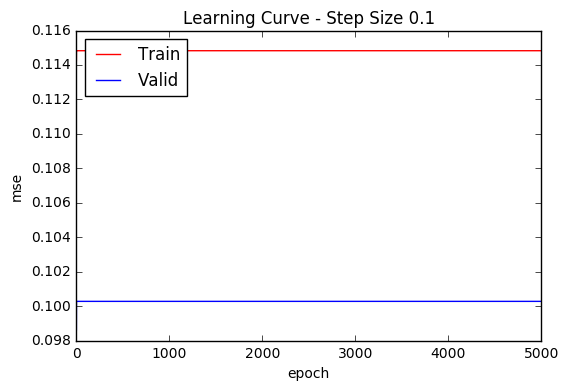

In [244]:
plotTrainValid(trainMse, validMse, 1e-1)

In [245]:
# We see that a step size of 1e-2 converges the fastest with 16 epochs.
# It does converge faster with a step size of 1e-1 but not to the right weight or MSE values.

testMse = calcMse(input_test, output_test, bestStepW)
print(testMse)

0.0693124975713


In [246]:
# Visualizing the fit over 5 epochs between epochs 0 and 20

epochs = [0, 5, 10, 15, 20]

w = [2.5, 4.5] # Initial estimation
ws = []
mses = []
for i in range (epochs[-1]+1): # sweeps
    w = epoch(input_train, output_train, w, 1e-2) # optimal step size
    if (i in epochs):
        mse = calcMse(input_test, output_test, w)
        ws.append(w)
        mses.append(mse)
            
def visualizeFit(i):
    e = epochs[i] # epoch 0
    w = ws[i]
    def p_y(x): # predicted y
        return w[0] + x*w[1]
    vp = np.vectorize(p_y)
    cont_x = np.linspace(0, 1.6, num=1000)
    cont_y = vp(cont_x)
    plt.plot(cont_x, cont_y, c='b', label="Predicted")
    plt.scatter(input_train, output_train, c='r', label='Real')
    plt.title("Epoch " + str(epochs[i]) + ": MSE = " + str(mses[i]))
    plt.legend(loc=2)

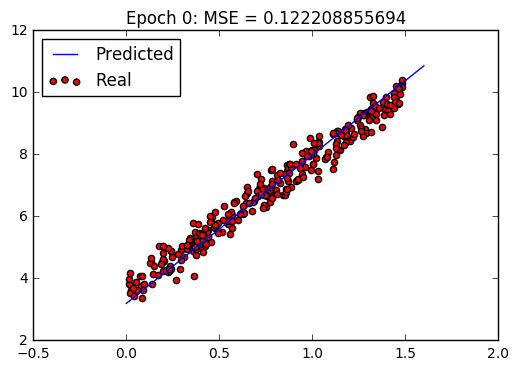

In [247]:
visualizeFit(0)

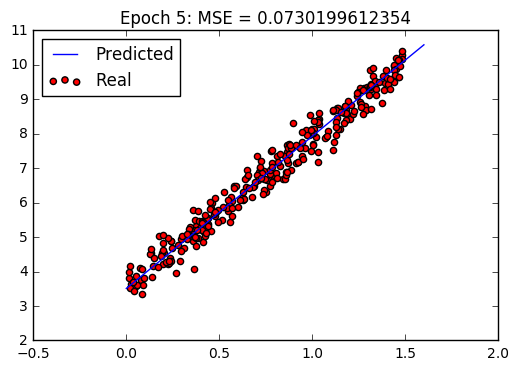

In [248]:
visualizeFit(1)

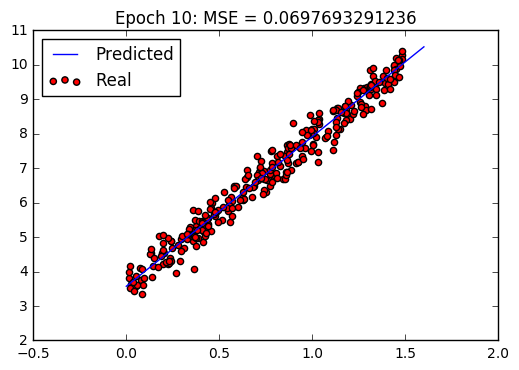

In [249]:
visualizeFit(2)

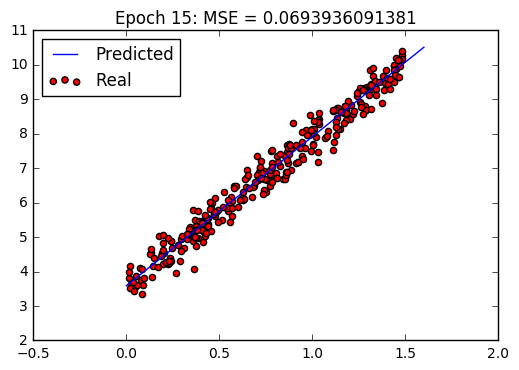

In [250]:
visualizeFit(3)

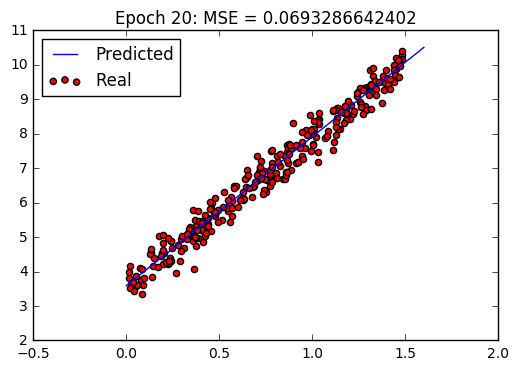

In [251]:
visualizeFit(4)

In [252]:
print(bestStepW)

[3.589232765108918, 4.3247691957865344]
